In [1]:
from IPython.display import Audio
from scipy.io import wavfile

In [2]:
%matplotlib inline

import matplotlib
import numpy
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (17., 3.)

In [3]:
from blizzard import Blizzard
from utils import mgcf02wav, mgcf0sp2wav
dataset = Blizzard(which_sets = ('train',), filename = "mgc_blizzard_sentence.hdf5")

In [4]:
from fuel.schemes import ShuffledExampleScheme
from fuel.streams import DataStream
data_stream = DataStream.default_stream(
                dataset,
                iteration_scheme=ShuffledExampleScheme(dataset.num_examples))
epoch_iterator = data_stream.get_epoch_iterator()
print dataset.sources

(u'f0', u'mgc', u'spectrum', u'transcripts', u'voicing_str')


# Blizzard Data Exploration

## Collect a lot of analysis to find extreme values

In [ ]:
dataset.num_examples

32590

In [ ]:
num_examples = dataset.num_examples
cont = 0
attention_proportion = numpy.zeros(num_examples)

f0_data = []
mgc_data = []
spectrum_data = []
transcripts_data = []
voicing_str_data = []

while cont < num_examples:
    if cont % 1000 == 0:
        print "Processed :", cont, " out of :", num_examples
    f0, mgc, spectrum, transcripts, voicing_str = next(epoch_iterator)
    
    f0_data.append(f0)
    mgc_data.append(mgc)
    spectrum_data.append(spectrum)
    transcripts_data.append(transcripts)
    voicing_str_data.append(voicing_str)
    cont += 1

Processed : 0  out of : 32590
Processed : 1000  out of : 32590
Processed : 2000  out of : 32590
Processed : 3000  out of : 32590
Processed : 4000  out of : 32590
Processed : 5000  out of : 32590
Processed : 6000  out of : 32590
Processed : 7000  out of : 32590
Processed : 8000  out of : 32590
Processed : 9000  out of : 32590
Processed : 10000  out of : 32590
Processed : 11000  out of : 32590
Processed : 12000  out of : 32590
Processed : 13000  out of : 32590
Processed : 14000  out of : 32590
Processed : 15000  out of : 32590
Processed : 16000  out of : 32590
Processed : 17000  out of : 32590
Processed : 30000  out of : 32590
Processed : 31000  out of : 32590
Processed : 32000  out of : 32590


min: 	363
1th: 	526.89
5th: 	646.0
mean: 	1483.72052777
50th: 	1275.0
95th: 	3025.0
99th: 	4286.0
max: 	12832


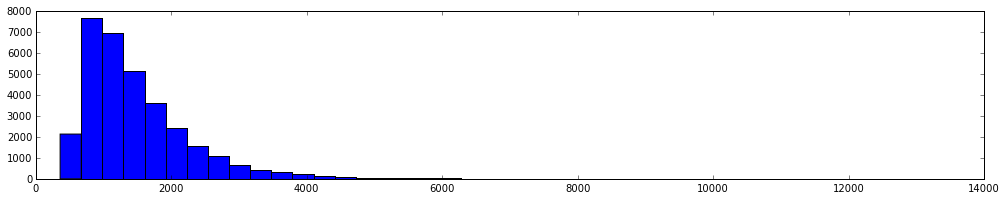

In [ ]:
audio_len = numpy.array([len(x_) for x_ in f0_data])
pyplot.hist(audio_len, bins = 40);
print "min: \t", audio_len.min()
print "1th: \t", numpy.percentile(audio_len, 1)
print "5th: \t", numpy.percentile(audio_len, 5)
print "mean: \t", audio_len.mean()
print "50th: \t", numpy.percentile(audio_len, 50)
print "95th: \t", numpy.percentile(audio_len, 95)
print "99th: \t", numpy.percentile(audio_len, 99)
print "max: \t", audio_len.max()

audio_len_lower_limit = 500
audio_len_upper_limit = 4500

min: 	14
1th: 	23.0
5th: 	29.0
mean: 	83.0113224916
50th: 	71.0
95th: 	178.55
99th: 	256.0
max: 	787


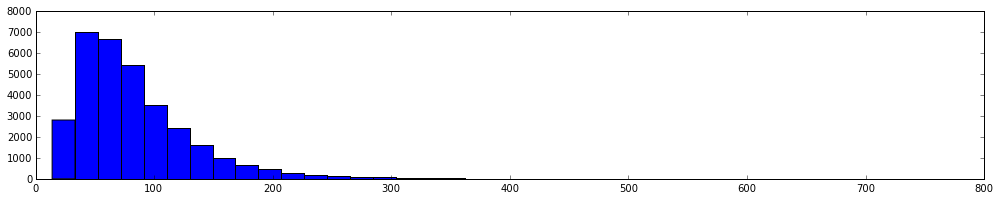

In [ ]:
transcripts_len = numpy.array([len(x_) for x_ in transcripts_data])
pyplot.hist(transcripts_len, bins = 40);
print "min: \t", transcripts_len.min()
print "1th: \t", numpy.percentile(transcripts_len, 1)
print "5th: \t", numpy.percentile(transcripts_len, 5)
print "mean: \t", transcripts_len.mean()
print "50th: \t", numpy.percentile(transcripts_len, 50)
print "95th: \t", numpy.percentile(transcripts_len, 95)
print "99th: \t", numpy.percentile(transcripts_len, 99)
print "max: \t", transcripts_len.max()

transcripts_len_lower_limit = 21
transcripts_len_upper_limit = 300

min: 	12.0136986301
1th: 	14.148005698
5th: 	15.0983606557
mean: 	18.7067522141
50th: 	18.0222222222
95th: 	24.5891304348
99th: 	29.5026190476
max: 	51.4736842105


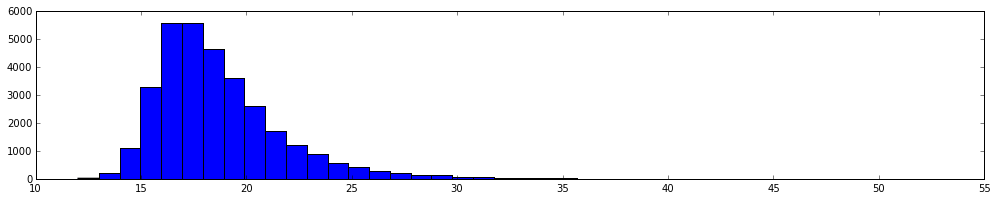

In [ ]:
attention_proportion = numpy.array([len(f0_) / float(len(trans_)) for f0_, trans_ in zip(f0_data, transcripts_data)])
pyplot.hist(attention_proportion, bins = 40);
print "min: \t", attention_proportion.min()
print "1th: \t", numpy.percentile(attention_proportion, 1)
print "5th: \t", numpy.percentile(attention_proportion, 5)
print "mean: \t", attention_proportion.mean()
print "50th: \t", numpy.percentile(attention_proportion, 50)
print "95th: \t", numpy.percentile(attention_proportion, 95)
print "99th: \t", numpy.percentile(attention_proportion, 99)
print "max: \t", attention_proportion.max()

attention_proportion_lower_limit = 13 
attention_proportion_upper_limit = 30

min: 	-8.7457
1th: 	-0.344062809944
5th: 	-0.235467172414
mean: 	-0.0878051
50th: 	-0.103953991085
95th: 	-0.0328859128058
99th: 	1.08076234818
max: 	1.71195


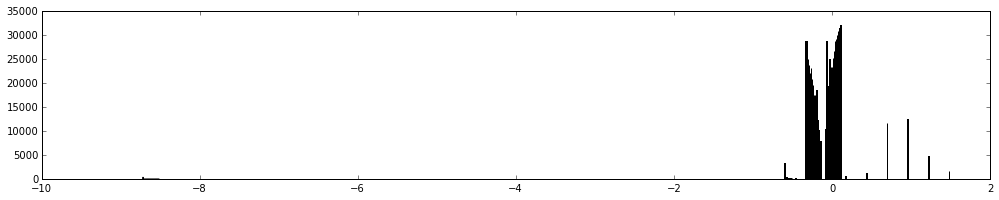

In [ ]:
min_mgc = numpy.array([x_.min(axis = 0) for x_ in mgc_data])
pyplot.hist(min_mgc, bins = 40);
print "min: \t", min_mgc.min()
print "1th: \t", numpy.percentile(min_mgc, 1)
print "5th: \t", numpy.percentile(min_mgc, 5)
print "mean: \t", min_mgc.mean()
print "50th: \t", numpy.percentile(min_mgc, 50)
print "95th: \t", numpy.percentile(min_mgc, 95)
print "99th: \t", numpy.percentile(min_mgc, 99)
print "max: \t", min_mgc.max()

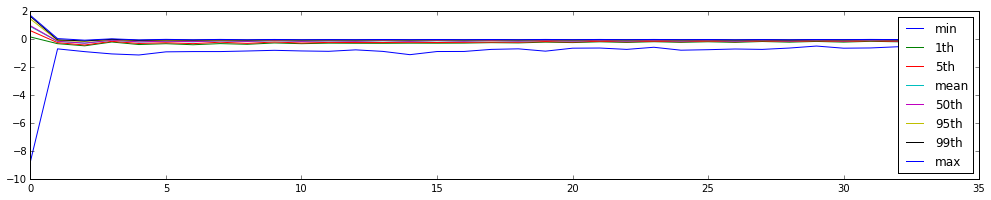

In [ ]:
pyplot.plot(min_mgc.min(axis = 0), label = 'min');
pyplot.plot(numpy.percentile(min_mgc, 1, axis = 0), label = '1th');
pyplot.plot(numpy.percentile(min_mgc, 5, axis = 0), label = '5th');
pyplot.plot(min_mgc.mean(axis = 0), label = 'mean');
pyplot.plot(numpy.percentile(min_mgc, 50, axis = 0), label = '50th');
pyplot.plot(numpy.percentile(min_mgc, 95, axis = 0), label = '95th');
pyplot.plot(numpy.percentile(min_mgc, 99, axis = 0), label = '99th');
pyplot.plot(min_mgc.max(axis = 0), label = 'max');
pyplot.legend();

min: 	0.00540706
1th: 	0.0266382862255
5th: 	0.0409418869764
mean: 	0.185172
50th: 	0.108164645731
95th: 	0.498836158216
99th: 	1.95622183561
max: 	3.01449


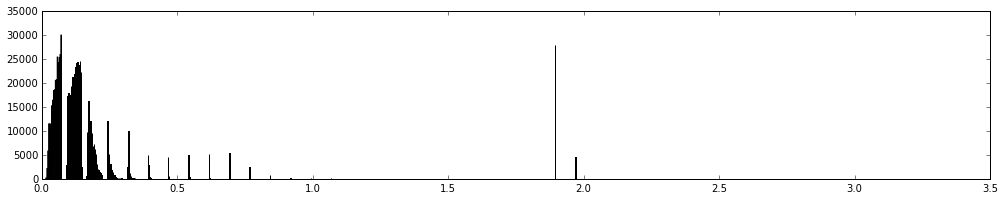

In [ ]:
max_mgc = numpy.array([x_.max(axis = 0) for x_ in mgc_data])
pyplot.hist(max_mgc, bins = 40);
print "min: \t", max_mgc.min()
print "1th: \t", numpy.percentile(max_mgc, 1)
print "5th: \t", numpy.percentile(max_mgc, 5)
print "mean: \t", max_mgc.mean()
print "50th: \t", numpy.percentile(max_mgc, 50)
print "95th: \t", numpy.percentile(max_mgc, 95)
print "99th: \t", numpy.percentile(max_mgc, 99)
print "max: \t", max_mgc.max()

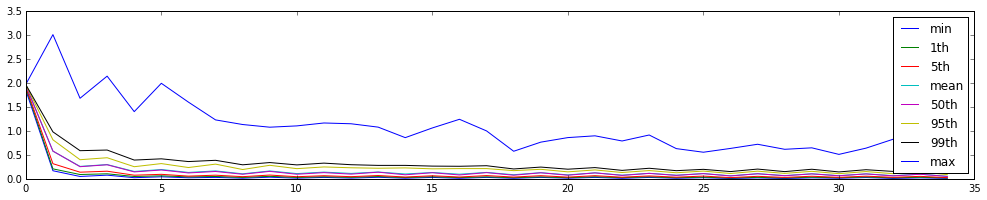

In [ ]:
pyplot.plot(max_mgc.min(axis = 0), label = 'min');
pyplot.plot(numpy.percentile(max_mgc, 1, axis = 0), label = '1th');
pyplot.plot(numpy.percentile(max_mgc, 5, axis = 0), label = '5th');
pyplot.plot(max_mgc.mean(axis = 0), label = 'mean');
pyplot.plot(numpy.percentile(max_mgc, 50, axis = 0), label = '50th');
pyplot.plot(numpy.percentile(max_mgc, 95, axis = 0), label = '95th');
pyplot.plot(numpy.percentile(max_mgc, 99, axis = 0), label = '99th');
pyplot.plot(max_mgc.max(axis = 0), label = 'max');
pyplot.legend();

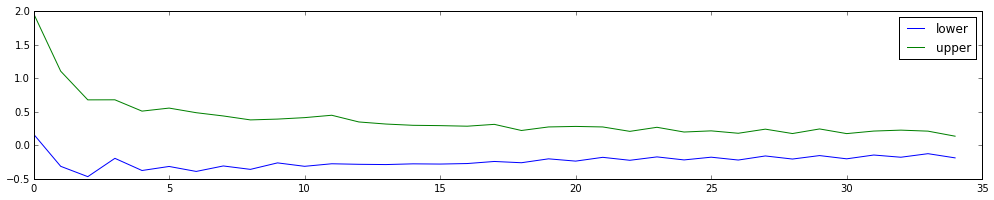

In [ ]:
mgc_lower_limit = numpy.percentile(min_mgc, 1, axis = 0)
mgc_upper_limit = numpy.percentile(max_mgc, 99.5, axis = 0)
pyplot.plot(mgc_lower_limit, label = 'lower');
pyplot.plot(mgc_upper_limit, label = 'upper');
pyplot.legend();

min: 	-3.54061
1th: 	-1.48009387493
5th: 	-0.74197999239
mean: 	0.572642
50th: 	0.473761752248
95th: 	2.16226291656
99th: 	3.14486420631
max: 	8.6804


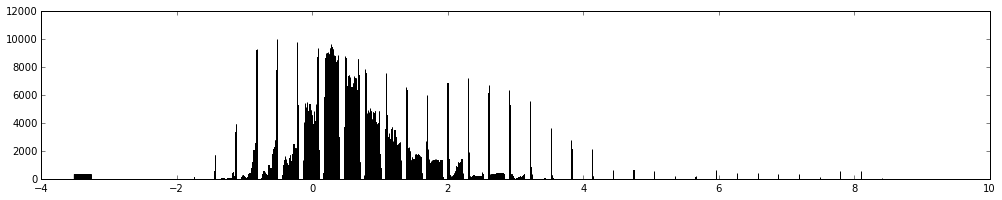

In [17]:
min_spectrum = numpy.array([x_.min(axis = 0) for x_ in spectrum_data])
pyplot.hist(min_spectrum, bins = 40);
print "min: \t", min_spectrum.min()
print "1th: \t", numpy.percentile(min_spectrum, 1)
print "5th: \t", numpy.percentile(min_spectrum, 5)
print "mean: \t", min_spectrum.mean()
print "50th: \t", numpy.percentile(min_spectrum, 50)
print "95th: \t", numpy.percentile(min_spectrum, 95)
print "99th: \t", numpy.percentile(min_spectrum, 99)
print "max: \t", min_spectrum.max()

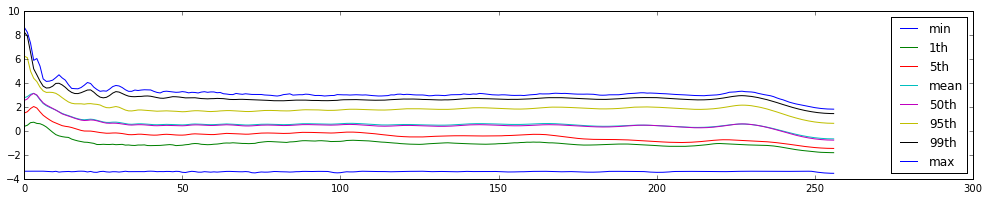

In [18]:
pyplot.plot(min_spectrum.min(axis = 0), label = 'min');
pyplot.plot(numpy.percentile(min_spectrum, 1, axis = 0), label = '1th');
pyplot.plot(numpy.percentile(min_spectrum, 5, axis = 0), label = '5th');
pyplot.plot(min_spectrum.mean(axis = 0), label = 'mean');
pyplot.plot(numpy.percentile(min_spectrum, 50, axis = 0), label = '50th');
pyplot.plot(numpy.percentile(min_spectrum, 95, axis = 0), label = '95th');
pyplot.plot(numpy.percentile(min_spectrum, 99, axis = 0), label = '99th');
pyplot.plot(min_spectrum.max(axis = 0), label = 'max');
pyplot.legend();

min: 	2.79277
1th: 	5.5925594902
5th: 	6.44815766811
mean: 	8.46081
50th: 	8.33786487579
95th: 	10.9031039238
99th: 	11.6623946476
max: 	12.9391


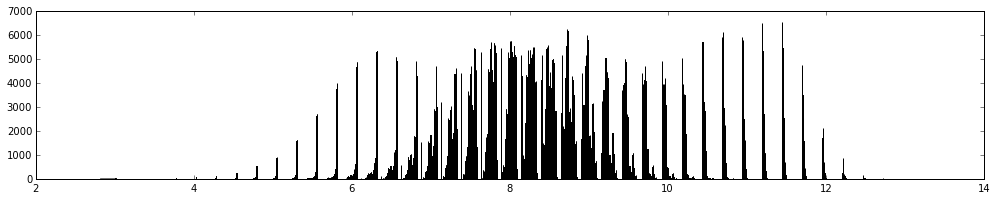

In [19]:
max_spectrum = numpy.array([x_.max(axis = 0) for x_ in spectrum_data])
pyplot.hist(max_spectrum, bins = 40);
print "min: \t", max_spectrum.min()
print "1th: \t", numpy.percentile(max_spectrum, 1)
print "5th: \t", numpy.percentile(max_spectrum, 5)
print "mean: \t", max_spectrum.mean()
print "50th: \t", numpy.percentile(max_spectrum, 50)
print "95th: \t", numpy.percentile(max_spectrum, 95)
print "99th: \t", numpy.percentile(max_spectrum, 99)
print "max: \t", max_spectrum.max()

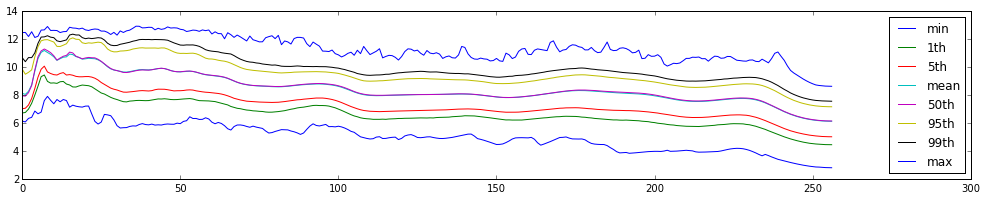

In [20]:
pyplot.plot(max_spectrum.min(axis = 0), label = 'min');
pyplot.plot(numpy.percentile(max_spectrum, 1, axis = 0), label = '1th');
pyplot.plot(numpy.percentile(max_spectrum, 5, axis = 0), label = '5th');
pyplot.plot(max_spectrum.mean(axis = 0), label = 'mean');
pyplot.plot(numpy.percentile(max_spectrum, 50, axis = 0), label = '50th');
pyplot.plot(numpy.percentile(max_spectrum, 95, axis = 0), label = '95th');
pyplot.plot(numpy.percentile(max_spectrum, 99, axis = 0), label = '99th');
pyplot.plot(max_spectrum.max(axis = 0), label = 'max');
pyplot.legend();

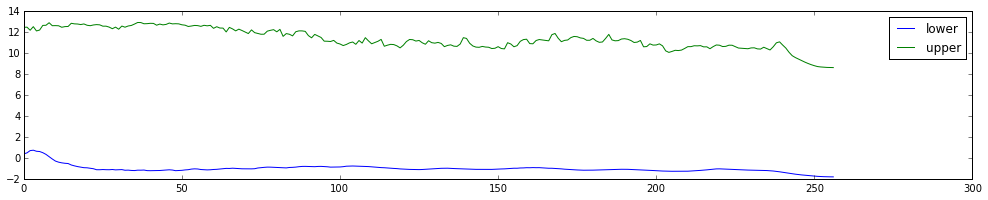

In [21]:
spectrum_lower_limit = numpy.percentile(min_spectrum, 1, axis = 0)
spectrum_upper_limit = numpy.percentile(max_spectrum, 100, axis = 0)
pyplot.plot(spectrum_lower_limit, label = 'lower');
pyplot.plot(spectrum_upper_limit, label = 'upper');
pyplot.legend();

voiced proportion:  0.58789835939
min: 	34.4436
1th: 	46.946255722
5th: 	57.3949363708
mean: 	90.5127
50th: 	87.4583053589
95th: 	124.362312317
99th: 	208.104796753
max: 	788.516


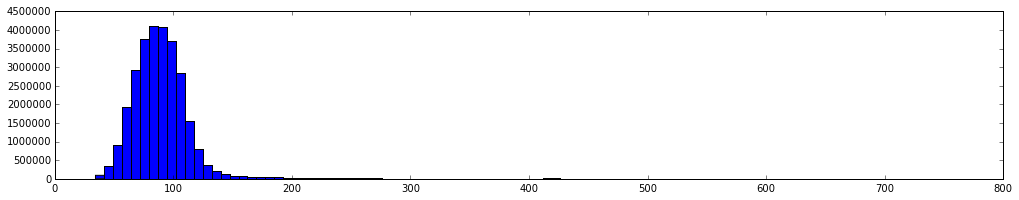

In [22]:
f0_data_flatten = numpy.hstack(f0_data)
print "voiced proportion: ", numpy.array(f0_data_flatten > 0).mean()

f0_data_flatten = f0_data_flatten[f0_data_flatten>0]
pyplot.hist(f0_data_flatten, bins = 100);

print "min: \t", f0_data_flatten.min()
print "1th: \t", numpy.percentile(f0_data_flatten, 1)
print "5th: \t", numpy.percentile(f0_data_flatten, 5)
print "mean: \t", f0_data_flatten.mean()
print "50th: \t", numpy.percentile(f0_data_flatten, 50)
print "95th: \t", numpy.percentile(f0_data_flatten, 95)
print "99th: \t", numpy.percentile(f0_data_flatten, 99)
print "max: \t", f0_data_flatten.max()

min: 	0.162384378212
1th: 	0.375466570279
5th: 	0.442347602167
mean: 	0.575352806599
50th: 	0.58153269413
95th: 	0.687094457415
99th: 	0.729396225773
max: 	0.904761904762


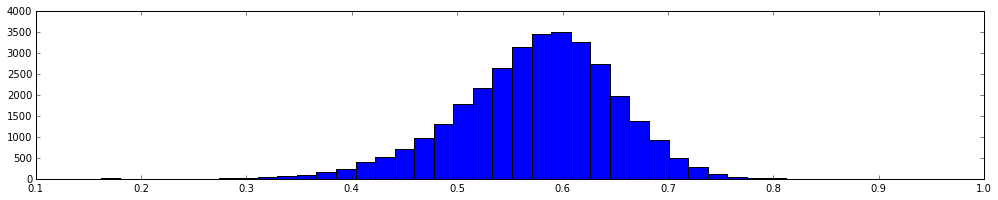

In [23]:
voiced_proportion = numpy.array([(x_ > 0).mean() for x_ in f0_data])
pyplot.hist(voiced_proportion, bins = 40);
print "min: \t", voiced_proportion.min()
print "1th: \t", numpy.percentile(voiced_proportion, 1)
print "5th: \t", numpy.percentile(voiced_proportion, 5)
print "mean: \t", voiced_proportion.mean()
print "50th: \t", numpy.percentile(voiced_proportion, 50)
print "95th: \t", numpy.percentile(voiced_proportion, 95)
print "99th: \t", numpy.percentile(voiced_proportion, 99)
print "max: \t", voiced_proportion.max()

voiced_proportion_lower_limit = .35
voiced_proportion_upper_limit = .75

min: 	34.4436
1th: 	36.1055604935
5th: 	38.2516387939
mean: 	54.9157
50th: 	54.4981403351
95th: 	73.1854827881
99th: 	81.7341795349
max: 	117.518


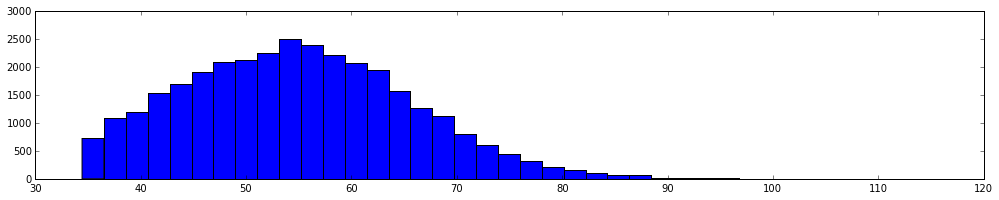

In [24]:
voiced_f0_data = [x_[x_ > 0] for x_ in f0_data]
min_voiced = numpy.array([ min(f0_) for f0_ in voiced_f0_data])
pyplot.hist(min_voiced, bins = 40);
print "min: \t", min_voiced.min()
print "1th: \t", numpy.percentile(min_voiced, 1)
print "5th: \t", numpy.percentile(min_voiced, 5)
print "mean: \t", min_voiced.mean()
print "50th: \t", numpy.percentile(min_voiced, 50)
print "95th: \t", numpy.percentile(min_voiced, 95)
print "99th: \t", numpy.percentile(min_voiced, 99)
print "max: \t", min_voiced.max()

min_voiced_lower_limit = 35
min_voiced_upper_limit = 85

min: 	64.1556
1th: 	100.046563263
5th: 	110.540462112
mean: 	240.117
50th: 	198.882476807
95th: 	531.53921814
99th: 	698.178606567
max: 	788.516


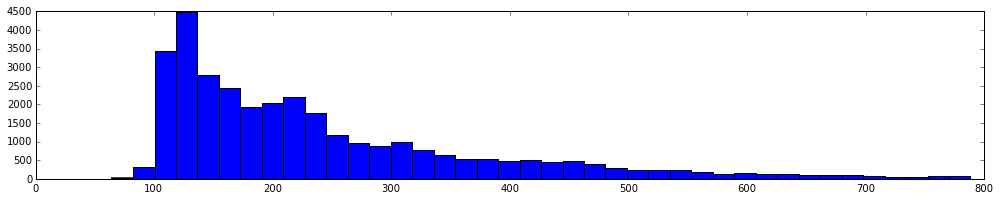

In [25]:
max_voiced = numpy.array([ max(f0_) for f0_ in voiced_f0_data])
pyplot.hist(max_voiced, bins = 40);
print "min: \t", max_voiced.min()
print "1th: \t", numpy.percentile(max_voiced, 1)
print "5th: \t", numpy.percentile(max_voiced, 5)
print "mean: \t", max_voiced.mean()
print "50th: \t", numpy.percentile(max_voiced, 50)
print "95th: \t", numpy.percentile(max_voiced, 95)
print "99th: \t", numpy.percentile(max_voiced, 99)
print "max: \t", max_voiced.max()

max_voiced_lower_limit = 98

In [26]:
keep_idx = numpy.zeros(num_examples, dtype = 'bool')
conditions = numpy.zeros((num_examples, 16), dtype = 'bool')
for example_idx in range(num_examples):
    f0 = f0_data[example_idx]
    mgc = mgc_data[example_idx]
    spectrum = spectrum_data[example_idx]
    transcripts = transcripts_data[example_idx]
    voicing_str = voicing_str_data[example_idx]
    
    len_f0 = len(f0)
    len_transcripts = len(transcripts)
    attention_proportion = len_f0 / float(len_transcripts)
    min_mgc = mgc.min(axis=0)
    max_mgc = mgc.max(axis=0)
    min_spectrum = spectrum.min(axis=0)
    max_spectrum = spectrum.max(axis=0)
    voiced_proportion = (f0 > 0).mean()
    min_voiced = f0[f0 > 0].min()
    max_voiced = f0[f0 > 0].max()
    
    conditions[example_idx] = numpy.array([
            len_f0 >= audio_len_lower_limit,
            len_f0 <= audio_len_upper_limit,
            len_transcripts >= transcripts_len_lower_limit,
            len_transcripts <= transcripts_len_upper_limit,
            attention_proportion >= attention_proportion_lower_limit,
            attention_proportion <= attention_proportion_upper_limit,
            (min_mgc >= mgc_lower_limit).all(),
            (max_mgc <= mgc_upper_limit).all(),
            (min_spectrum >= spectrum_lower_limit).all(),
            (max_spectrum <= spectrum_upper_limit).all(),
            voiced_proportion >= voiced_proportion_lower_limit,
            voiced_proportion <= voiced_proportion_upper_limit,
            min_voiced >= min_voiced_lower_limit,
            min_voiced <= min_voiced_upper_limit,
            max_voiced >= max_voiced_lower_limit,
            not numpy.isnan(voicing_str).any()
        ])
    
    keep_idx[example_idx] = conditions[example_idx].all()

In [27]:
print keep_idx.mean()
print conditions.mean(axis = 0)

0.793218778766
[ 0.99355631  0.99208346  0.99714636  0.99591899  0.99932495  0.9912243
  0.87496164  0.95937404  0.95869899  1.          0.99466094  0.99558147
  0.99993863  0.99515189  0.99183799  0.96155262]


In [28]:
file_name = '/data/lisatmp4/sotelo/data/blizzard/blizzard_limits.npz'
numpy.savez(file_name,
    audio_len_lower_limit = audio_len_lower_limit,
    audio_len_upper_limit = audio_len_upper_limit,
    transcripts_len_lower_limit = transcripts_len_lower_limit,
    transcripts_len_upper_limit = transcripts_len_upper_limit,
    attention_proportion_lower_limit = attention_proportion_lower_limit,
    attention_proportion_upper_limit = attention_proportion_upper_limit,
    mgc_lower_limit = mgc_lower_limit,
    mgc_upper_limit = mgc_upper_limit,
    spectrum_lower_limit = spectrum_lower_limit,
    spectrum_upper_limit = spectrum_upper_limit,
    voiced_proportion_lower_limit = voiced_proportion_lower_limit,
    voiced_proportion_upper_limit = voiced_proportion_upper_limit,
    min_voiced_lower_limit = min_voiced_lower_limit,
    min_voiced_upper_limit = min_voiced_upper_limit,
    max_voiced_lower_limit = max_voiced_lower_limit)

In [29]:
means = []
stds = []

for example_idx in range(num_examples):
    f0 = f0_data[example_idx]
    mgc = mgc_data[example_idx]
    spectrum = spectrum_data[example_idx]
    transcripts = transcripts_data[example_idx]
    
    f0[f0>300] = 300
    
    if keep_idx[example_idx]:

        means.append([
            f0[f0>0].mean(),
            mgc.mean(axis=0),
            spectrum.mean(axis=0),
            voicing_str.mean(axis=0)
            ])

        stds.append([
            f0[f0>0].std(),
            mgc.std(axis=0),
            spectrum.std(axis=0),
            voicing_str.std(axis=0)
            ])

In [30]:
means = [numpy.array(mean_).mean(axis = 0) for mean_ in zip(*means)]
stds = [numpy.array(std_).mean(axis = 0) for std_ in zip(*stds)]
new_mean_f0, new_mean_mgc, new_mean_spectrum, new_mean_voicing_str = means
new_std_f0, new_std_mgc, new_std_spectrum, new_std_voicing_str = stds

In [31]:
from utils import (
    mean_f0, mean_mgc, mean_spectrum, std_f0, std_mgc, std_spectrum)

print mean_f0
print std_f0

90.2025146484
22.9741134644


In [32]:
import os
data_dir = os.environ['FUEL_DATA_PATH']
data_dir = os.path.join(data_dir, 'blizzard/', 'new_full_standardize.npz')

numpy.savez(data_dir,
    mean_f0 = new_mean_f0,
    mean_mgc = new_mean_mgc,
    mean_spectrum = new_mean_spectrum,
    mean_voicing_str = new_mean_voicing_str,
    std_f0 = new_std_f0,
    std_mgc = new_std_mgc,
    std_spectrum = new_std_spectrum,
    std_voicing_str = new_std_voicing_str)

## Voicing Strings NaN

In [33]:
numpy.array([numpy.isnan(x_).any() for x_ in voicing_str_data]).mean()

0.038447376495857624

# Audio Reconstruction

In [36]:
epoch_iterator = data_stream.get_epoch_iterator()
f0, mgc, spectrum, transcripts, voicing_str = next(epoch_iterator)

## Text

In [37]:
all_chars = ([chr(ord('A') + i) for i in range(26)] + [' ', '<UNK>'])
code2char = dict(enumerate(all_chars))
print "".join([code2char[x].lower() for x in transcripts])

and which it was thought well to keep alive on this new soil for the sake of the courage and manliness that were essential


## Reconstructed MGC

In [ ]:
sr = 16000
x_synth = mgcf02wav(mgc, f0)
x_synth = .95 * x_synth/max(abs(x_synth)) * 2**15
Audio(data = x_synth.astype('int16'), rate = sr)

## Reconstructed MGC + voicing strings

In [ ]:
sr = 16000
x_synth = mgcf0sp2wav(mgc, f0, voicing_str)
x_synth = .95 * x_synth/max(abs(x_synth)) * 2**15
Audio(data = x_synth.astype('int16'), rate = sr)

# MGC

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(mgc.mean(axis=0));
ax1.plot(mgc.max(axis=0));
ax1.plot(mgc.min(axis=0));
ax2.plot(mgc.std(axis=0));

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(numpy.linalg.norm(mgc,axis=0));
ax2.plot(numpy.linalg.norm(mgc[:,1:],axis=0));

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.boxplot(mgc);
ax2.boxplot(mgc[:,1:]);

In [ ]:
pyplot.plot(mgc[:,1:]);

In [ ]:
pyplot.imshow(numpy.corrcoef(mgc.T));

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(numpy.linalg.norm(mgc[:,1:],axis=1));
ax2.plot(numpy.linalg.norm(spectrum,axis=1));

In [ ]:
pyplot.imshow(mgc[:,1:].T, aspect = 'auto', interpolation = 'nearest', origin = 'lower');
pyplot.colorbar();

## Spectrum

In [ ]:
pyplot.imshow(spectrum.T, origin = 'lower', aspect = 'auto', interpolation = 'nearest');
pyplot.colorbar();

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(spectrum.mean(axis=0));
ax1.plot(spectrum.max(axis=0));
ax1.plot(spectrum.min(axis=0));
ax2.plot(spectrum.std(axis=0));

In [ ]:
pyplot.boxplot(spectrum);

In [ ]:
pyplot.imshow(numpy.corrcoef(spectrum.T), origin = 'lower');
pyplot.colorbar();

In [ ]:
pyplot.plot(numpy.linalg.norm(spectrum,axis=1));

In [ ]:
pyplot.plot(spectrum[:,:10]);

## Pitch

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(f0)
ax2.hist(f0[f0>0], bins = 30);

## Voicing Str

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,0])
ax2.hist(voicing_str[:,0], bins = 30);

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,1])
ax2.hist(voicing_str[:,1], bins = 30);

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,2])
ax2.hist(voicing_str[:,2], bins = 30);

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,3])
ax2.hist(voicing_str[:,3], bins = 30);

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(voicing_str[:,4])
ax2.hist(voicing_str[:,4], bins = 30);

# Normalization

In [ ]:
import os
data_dir = os.environ['FUEL_DATA_PATH']
data_dir = os.path.join(data_dir, 'blizzard/', 'new_full_standardize.npz')
data_stats = numpy.load(data_dir)

mean_f0 = data_stats['mean_f0']
mean_mgc = data_stats['mean_mgc']
mean_spectrum = data_stats['mean_spectrum']
mean_voicing_str = data_stats['mean_voicing_str']

std_f0 = data_stats['std_f0']
std_mgc = data_stats['std_mgc']
std_spectrum = data_stats['std_spectrum']
std_voicing_str = data_stats['std_voicing_str']

In [ ]:
spectrum_standardized = (spectrum-mean_spectrum)/std_spectrum
mgc_standardized = (mgc-mean_mgc)/std_mgc

In [ ]:
numpy.percentile(spectrum_standardized,1)

In [ ]:
vmin = numpy.percentile(spectrum_standardized, 1)
vmax = numpy.percentile(spectrum_standardized,99)

pyplot.imshow(spectrum_standardized.T, origin = 'lower', aspect = 'auto', interpolation = 'nearest', vmin = vmin, vmax = vmax);
pyplot.colorbar();

In [ ]:
vmin = numpy.percentile(spectrum, 1)
vmax = numpy.percentile(spectrum,99)

pyplot.imshow(spectrum.T, origin = 'lower', aspect = 'auto', interpolation = 'nearest', vmin = vmin, vmax = vmax);
pyplot.colorbar();

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(mean_spectrum);
ax2.plot(std_spectrum);

In [ ]:
f, (ax1, ax2) = pyplot.subplots(1, 2)
ax1.plot(spectrum_standardized.mean(axis=0));
ax1.plot(spectrum_standardized.max(axis=0));
ax1.plot(spectrum_standardized.min(axis=0));
ax2.plot(spectrum_standardized.std(axis=0));